In [1]:
import numpy as np

### Problem 2

### (a)

In [2]:
def f(x):
    return x**4-2*x+1

In [3]:
def trapezoidal(N,a,b):
    h = (b-a)/N
    l = np.arange(h*1,b,h)
    I = h*(f(a)/2+f(b)/2+np.sum(f(l)))
    return I

In [4]:
def simpson(N,a,b):
    h = (b-a)/N
    l1 = np.arange(h*1,b,2*h)
    l2 = np.arange(h*2,b,2*h)
    I = (h/3)*(f(a)+f(b)+4*np.sum(f(l1))+2*np.sum(f(l2)))
    return I

### (b)

In [5]:
def true0(a,b):
    return 1/5*(b**5-a**5)-(b**2-a**2)+(b-a)

In [6]:
t = true0(0,2)
print(f'true value is {t}')

true value is 4.4


In [7]:
I = trapezoidal(10,0,2)
print(f'prediction of trapezoidal method is {I}')
print(f'error of trapezoidal method is {I-t}')

prediction of trapezoidal method is 4.50656
error of trapezoidal method is 0.10655999999999999


In [8]:
I = simpson(10,0,2)
print(f'prediction of simpson method is {I}')
print(f'error of simpson method is {I-t}')

prediction of simpson method is 4.400426666666668
error of simpson method is 0.0004266666666676855


### (c)

In [9]:
t = true0(0,2)
print(f'true value is {t}')

true value is 4.4


In [10]:
I = trapezoidal(100,0,2)
print(f'prediction of trapezoidal method is {I}')
print(f'error of trapezoidal method is {I-t}')

prediction of trapezoidal method is 4.401066656
error of trapezoidal method is 0.0010666559999998881


In [11]:
I = simpson(100,0,2)
print(f'prediction of simpson method is {I}')
print(f'error of simpson method is {I-t}')

prediction of simpson method is 4.400000042666666
error of simpson method is 4.26666657560304e-08


The comparison of result from two method is obvious that the simpson method is more accurate that the trapezoidal method.

## Problem 3

### (c)

In [12]:
l = np.arange(0.01,1,0.01)

In [13]:
def f(x):
    return x**3/((1-x)**5*(np.exp(x/(1-x))-1))

In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'f(z)')

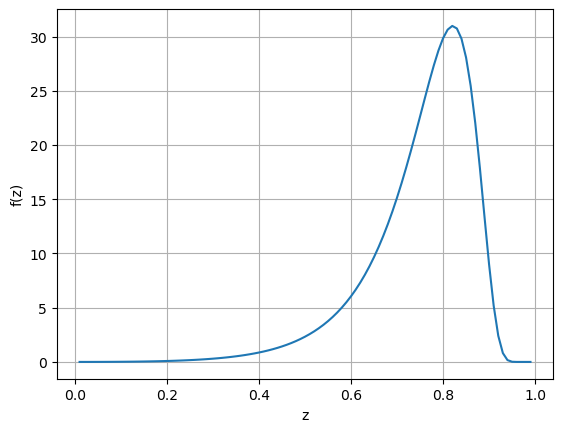

In [15]:
plt.grid(True)
plt.plot(l,f(l))
plt.xlabel('z')
plt.ylabel('f(z)')

### (d)

In [16]:
from sympy import *

In [17]:
x0 = Symbol('x0')

In [18]:
limit(x0**3/(((1-x0)**5)*(exp(x0/(1-x0))-1)), x0, 0,'+')

0

In [19]:
limit(x0**3/((1-x0)**5*(exp(x0/(1-x0))-1)), x0, 1,'-')

0

They are all limited to 0.

### (e)

In [20]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [21]:
def gaussian(a,b,N):
    x,w = gaussxwab(100,a,b)
    s = 0
    for i in range(N):
        s += w[i]*f(x[i])
    return s

In [22]:
import numpy as np
import math # 绝对值函数
from scipy import integrate # 求积分

## 求梯形值(返回用k阶复化梯形公式估计的积分)
def Trap(f,a,b,Iold,k):
    if k == 1:
        Inew = (f(a)+f(b))*(b-a)/2
#         print ('二分'+str(k-1)+'次后的梯形值为'+'%.6f'%Inew)
    else:
        n = pow(2,k-2)
        h = (b-a)/n # 步长
        x = a+(h/2) #第一步的中心点
        sum_k = 0
        for i in range(n):
            sum_k = sum_k + f(x) # 求和
            x = x + h # 下一个点
        Inew = (Iold+h*sum_k)/2 # 递推公式
#         print ('二分'+str(k-1)+'次后的梯形值为'+'%.6f'%Inew)
    return Inew

## 求加速值(运用理查森外推加速算法)
def Richardson(R,k):
    for i in range(k-1,0,-1):
        c = pow(2,2*(k-i))
        R[i] = (c*R[i+1]-R [i])/(c-1) # 龙贝格求积算法
#     for a in sorted(R.keys(),reverse=True)[1:]: # 逆序输出
#         print ('第'+str(k-1)+'次二分的第'+str(k-a)+'次加速值为'+'%.6f'%R[a])
    return R

## 龙贝格求积分
def romberg(f, a, b, eps):
    T = {} # 定义空字典
    k = 1
#     print ('区间[a,b]的二分次数为：'+str(k-1))
    T[1] = Trap(f,a,b,0.0,1)
    former_R = T[1]
    while True:
        k += 1
#         print ('\n区间[a,b]的二分次数为：'+str(k-1))
        # 求梯形值
        T[k] = Trap(f,a,b,T[k-1],k)
        # 求加速值
        T = Richardson(T,k)
        # 判断是否满足终止条件
        if abs(T[1] - former_R) < eps:
            return T[1]
        former_R = T[1] #最后一个值置为初始值
a = 10**-8 # 积分上限
b = 1-10**-8 # 积分下限
eps = 10**-13  # 给定精度

In [23]:
trapezoidal(100,10**-8,1-10**-8)

/var/folders/f_/8nk__yx15y1901fs7rvmc2f40000gn/T/ipykernel_17188/176436669.py:2: RuntimeWarning: overflow encountered in exp
  return x**3/((1-x)**5*(np.exp(x/(1-x))-1))


6.493939402637867

In [24]:
simpson(100,10**-8,1-10**-8)#because we can not 

/var/folders/f_/8nk__yx15y1901fs7rvmc2f40000gn/T/ipykernel_17188/176436669.py:2: RuntimeWarning: overflow encountered in exp
  return x**3/((1-x)**5*(np.exp(x/(1-x))-1))


6.4939403476972

In [25]:
gaussian(0,1,100)

/var/folders/f_/8nk__yx15y1901fs7rvmc2f40000gn/T/ipykernel_17188/176436669.py:2: RuntimeWarning: overflow encountered in exp
  return x**3/((1-x)**5*(np.exp(x/(1-x))-1))


6.493939402266831

In [26]:
romberg(f,a,b,eps) 

/var/folders/f_/8nk__yx15y1901fs7rvmc2f40000gn/T/ipykernel_17188/176436669.py:2: RuntimeWarning: overflow encountered in exp
  return x**3/((1-x)**5*(np.exp(x/(1-x))-1))


6.493939402266917

### (f)

In [27]:
def delta(I,c=299792458,h=6.62607015e-34,k_B=1.380649e-23):
    return (2*np.pi*k_B**4)/(c**2*h**3)*I

In [28]:
delta(gaussian(0,1,100))

/var/folders/f_/8nk__yx15y1901fs7rvmc2f40000gn/T/ipykernel_17188/176436669.py:2: RuntimeWarning: overflow encountered in exp
  return x**3/((1-x)**5*(np.exp(x/(1-x))-1))


5.670374419184433e-08

## Problem 4

### (a)

In [29]:
def s(x,y):
    if x**2+y**2<=1:
        return 1
    else:
        return 0

In [30]:
def f(y,a,b,n):
    h = (b-a)/n
    sum0 = 1/2*s(a,y)+1/2*s(b,y)
    for i in np.arange(a+h,b,h):
        sum0+=s(i,y)
    return h*sum0

In [31]:
def trapezoidal(N,a,b):
    h = (b-a)/N
    l = np.arange(h+a,b,h)
    I = f(a,-1,1,N)/2+f(b,-1,1,N)/2
    for i in l:
        I += f(i,a,b,N)
    return I*h

In [32]:
trapezoidal(20000,-1,1)

3.1415904300000355

### (b)

In [33]:
from random import *
seed(10)     #设定种子以固定随机数
 
dot=0
dots=1000000
 
for i in range(1,dots+1):
    x,y=np.random.uniform(-1,1),np.random.uniform(-1,1)
    r=pow(x**2+y**2,0.5)
    if r<=1:
        dot+=1
pi=4*(dot/dots)
print('所得圆周率为：{}'.format(pi))


所得圆周率为：3.141656


### (c)

In [ ]:
def f(x_1,x_2,x_3,x_4,x_5,x_6):
    if x_1**2+x_2**2+x_3**2+x_4**2+x_5**2+x_6**2<=1:
        return 1
    else:
        return 0

In [ ]:
def trapezoidal(f,a,b,N):
    h = (b-a)/N
    l = np.arange(h+a,b,h)
    I = h*(f(a)/2+f(b)/2+np.sum(f(l)))
    return I

In [ ]:
def g(li):
    sum_0 = 0
    h = 2/10
    for i in range(11**6):
        n = li[i,:]
        n = list(n)
        c = Counter(n)[1]+Counter(n)[-1]
        sum_0 += (1/2)**c*f(*n)
    return sum_0*h**6
    

In [ ]:
l = np.arange(-10,11,2)/10
li = np.zeros((11**6,6))
from collections import Counter
k = 0
for i0 in l:
    for i1 in l:
        for i2 in l:
            for i3 in l:
                for i4 in l:
                    for i5 in l:
                        li[k,:]=[i0,i1,i2,i3,i4,i5]
                        k+=1

In [ ]:
g(li)

### (d)

In [ ]:
from random import *
seed(10)     #设定种子以固定随机数
 
dot=0
dots=1000000
 
for i in range(1,dots+1):
    x_1,x_2,x_3,x_4,x_5,x_6=np.random.uniform(-1,1),np.random.uniform(-1,1),np.random.uniform(-1,1),np.random.uniform(-1,1),np.random.uniform(-1,1),np.random.uniform(-1,1)
    r=x_1**2+x_2**2+x_3**2+x_4**2+x_5**2+x_6**2
    if r<=1:
        dot+=1
pi=2**6*(dot/dots)
print(pi)

In [ ]:
1/6*np.pi**3

## Problem 5

In [100]:
import random

### (b)

In [265]:
def randomwalk():
    l = []
    a = [-1,1]
    for i in range(10000):
        l.append(random.choices(a,k=1000))
    return l

In [266]:
randomwalk0 = randomwalk()

In [267]:
randomwalk0 = np.array(randomwalk0)

In [268]:
np.sum(randomwalk0,1)/1000

array([-0.012, -0.012,  0.002, ..., -0.028, -0.022, -0.006])

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

In [274]:
def p(N):
    l = np.sum(randomwalk0[:,:N],1)
    plt.hist(l,color='red',bins=50,density=1)

In [275]:
l = np.sum(randomwalk0[:,:50],1)/10000
l

array([ 0.0008,  0.0014, -0.0002, ..., -0.0012, -0.002 ,  0.0008])

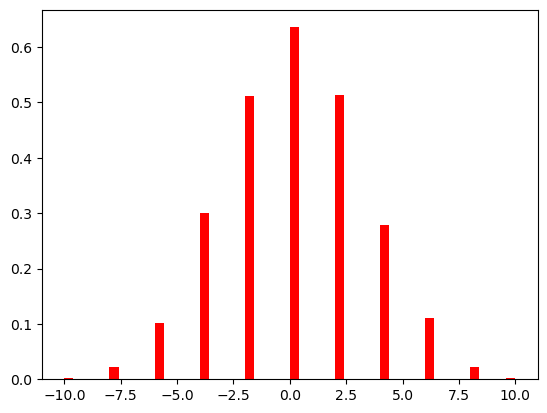

In [276]:
p(10)

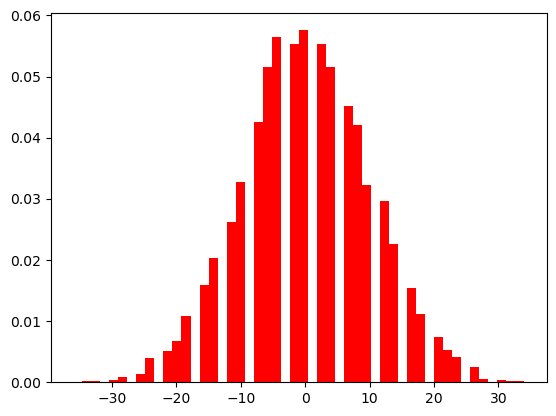

In [277]:
p(100)

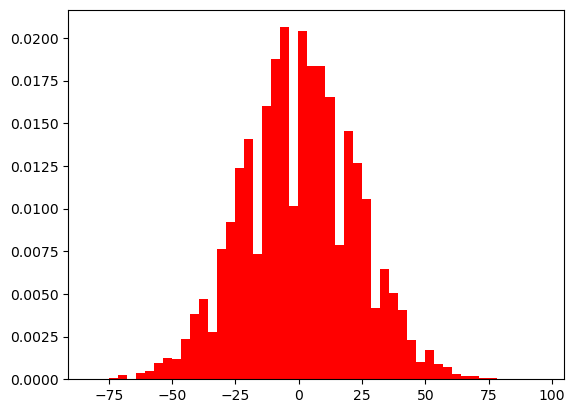

In [278]:
p(500)

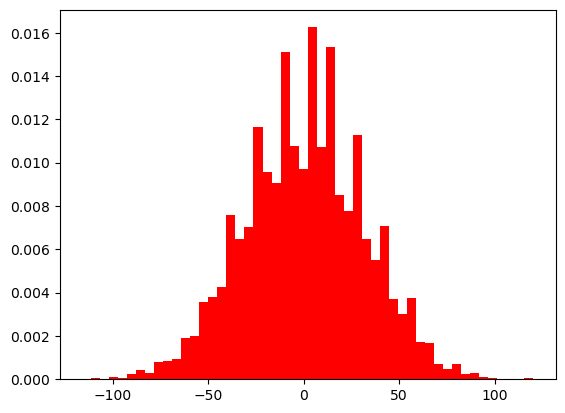

In [279]:
p(1000)

### (c)

In [280]:
l = np.sqrt(np.mean(np.sum(randomwalk0[:,:50],1)**2))

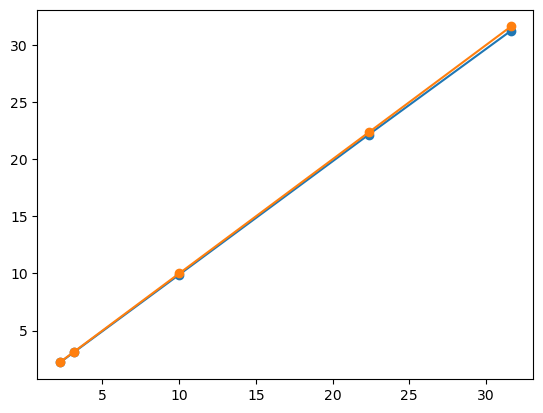

In [281]:
l = []
s = [5,10,100,500,1000]
for i in [5,10,100,500,1000]:
    l.append(np.sqrt(np.mean(np.sum(randomwalk0[:,:i],1)**2)))
plt.plot(np.sqrt(s),l,'-o')
plt.plot(np.sqrt(s),np.sqrt(s),'-o')

### (d)

In [282]:
def randomwalk():
    l = []
    a = [[0,1],[0,-1],[1,0],[-1,0]]
    for i in range(10000):
        l.append(random.choices(a,k=1000))
    return l

In [283]:
randomwalk2 = randomwalk()

### (e)

In [284]:
randomwalk2 = np.array(randomwalk2)

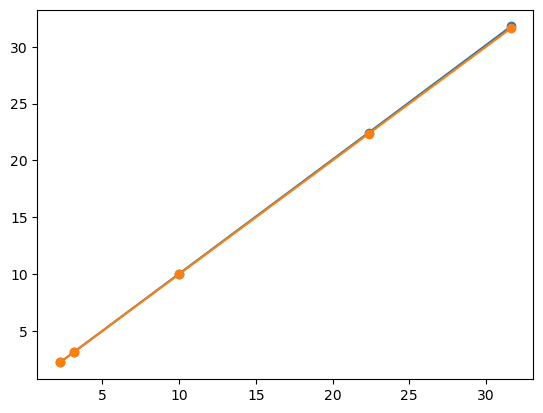

In [285]:
l = []
s = [5,10,100,500,1000]
for i in [5,10,100,500,1000]:
    l.append(np.sqrt(np.mean(np.sum(np.sum(randomwalk2[:,:i,:],1)**2,1))))
plt.plot(np.sqrt(s),l,'-o')
plt.plot(np.sqrt(s),np.sqrt(s),'-o')

### (f)

In [286]:
def randomwalk():
    l = []
    a = [[0,1],[0,-1],[1,0],[-1,0]]
    for i in range(10000):
        l.append(random.choices(a,k=10000))
    return l
randomwalk2 = randomwalk()

In [287]:
randomwalk2 = np.array(randomwalk2)

In [288]:
r = np.sqrt(np.sum(np.sum(randomwalk2,1)**2,1))

(array([5.84522505e-04, 9.62742950e-04, 1.40973075e-03, 2.51000840e-03,
        2.33809002e-03, 3.30083297e-03, 3.81658812e-03, 4.02289018e-03,
        4.43549430e-03, 4.71056372e-03, 5.36385358e-03, 5.84522505e-03,
        7.04865374e-03, 7.39249051e-03, 7.28933948e-03, 7.73632728e-03,
        7.77071095e-03, 8.25208243e-03, 8.49276816e-03, 8.52715184e-03,
        9.14605802e-03, 8.93975596e-03, 7.77071095e-03, 8.45838449e-03,
        9.14605802e-03, 9.35236008e-03, 7.56440889e-03, 8.59591919e-03,
        7.22057212e-03, 8.04578037e-03, 7.80509463e-03, 8.35523346e-03,
        7.22057212e-03, 7.22057212e-03, 6.80796800e-03, 7.94262934e-03,
        7.25495580e-03, 5.50138828e-03, 6.73920065e-03, 6.05152711e-03,
        5.26070255e-03, 5.98275976e-03, 4.77933107e-03, 4.91686578e-03,
        4.95124946e-03, 4.46987798e-03, 4.77933107e-03, 3.67905342e-03,
        3.71343709e-03, 4.02289018e-03, 3.30083297e-03, 2.92261253e-03,
        2.57877576e-03, 2.54439208e-03, 3.02576356e-03, 2.269322

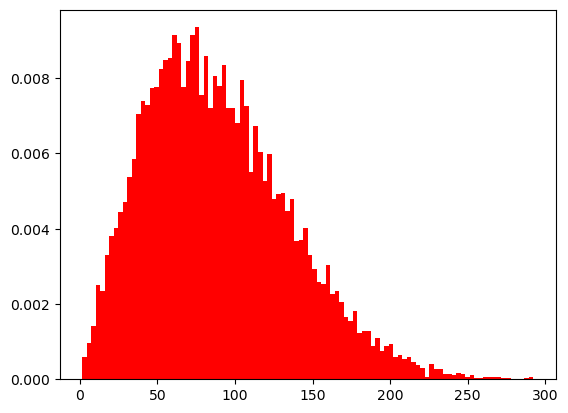

In [289]:
plt.hist(r,color='red',bins=100,density=1)

## Problem 6

### (b)

In [34]:
num = np.random.uniform(0,1,10000)
x = np.arcsin(2*num-1)

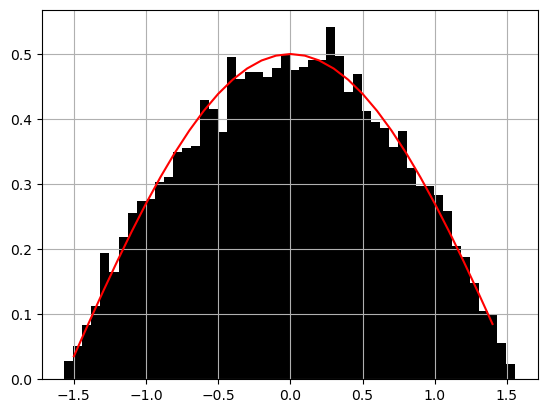

In [35]:
plt.figure()
plt.grid(True)
plt.hist(x,density=1,color='black',bins=50)
plt.plot(np.arange(-1.5,1.5,0.1),0.5*np.cos(np.arange(-1.5,1.5,0.1)),c='red')

### (d)

I use $\frac{3}{5}cosx$ to use the rejection method.

In [89]:
def f(x):
    if -1<=x<=1:
        return 3/5*(1-(x**2)/2)
    else:
        return 0

In [90]:
def reject(N,M=0.6):
    ys = np.zeros(N)
    n = 1
    k = 0
    while n<N:
        y = np.arcsin(5/3*np.random.uniform(0,6/5*np.sin(1),1)+np.sin(-1))
#         y = np.random.uniform(0,1,1)
        u = np.random.uniform(0,1,1)
        k += 1
        if u<f(y)/np.cos(y)/M:
            ys[n] = y
            n+=1
    return ys,k

In [91]:
l,k = reject(100000,M=0.6)

In [92]:
l0 = []
for i in np.arange(-1,1.1,0.1):
    l0.append(f(i))

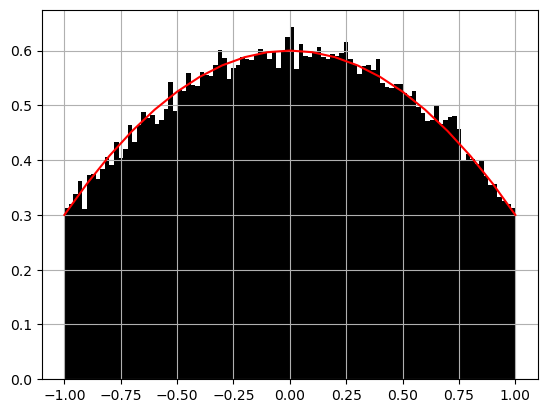

In [93]:
plt.figure()
plt.grid(True)
plt.hist(l,density=1,color='black',bins=100)
plt.plot(np.arange(-1,1.1,0.1),l0,c='red')

In [94]:
print("Fraction of accepted deviates:", 100000/k)

Fraction of accepted deviates: 0.9909035058166036


In [95]:
real = 3/5*(np.sin(1)-np.sin(-1))
f_0 = 1

In [96]:
print("Ratio of area under P(x) to f(x):", f_0/real)

Ratio of area under P(x) to f(x): 0.9903292548151011


It is really close to the fraction of deviates accepted